In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [6]:
data = pd.read_csv('E:/Srini/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [11]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [12]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  6328 704
length of y_train and y_test:  6328 704


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

lr_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
#result = lr_model.fit(X_train, y_train)

lr_prediction = lr_model.predict_proba(X_test)
lr_model.score(X_test, y_test)

0.8224431818181818

In [15]:
#Accuracy
Accuracy = (502+77)*100/(502+55+70+77) 
print("Accuracy {:0.2f}%:",format(Accuracy))

Accuracy {:0.2f}%: 82.24431818181819


In [16]:
lr_prediction[:5]

array([[0.35621249, 0.64378751],
       [0.83348645, 0.16651355],
       [0.72989765, 0.27010235],
       [0.24849987, 0.75150013],
       [0.93476946, 0.06523054]])

In [17]:
lr_pred = lr_model.predict(X_test)
#lr_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, lr_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, lr_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, lr_pred))

Prdiction: 0.8224431818181818
Precision: 0.5833333333333334
Recall: 0.5238095238095238


In [18]:
from sklearn.metrics import roc_auc_score
print (metrics.roc_auc_score(y_test, lr_prediction[:, 1]))

0.8267077028297853


In [19]:
#Compute the decision scores
y_scores_lr = lr_model.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

#Show the decision_function scores for first 20 instances
y_score_list

[(0, 0.5918412932623155),
 (0, -1.610540761675177),
 (0, -0.99410337012693),
 (0, 1.106629048183771),
 (0, -2.662372184719287),
 (0, -3.661492475768181),
 (0, 0.20498030247210564),
 (0, -5.449442216097792),
 (1, 0.858084898257372),
 (1, 0.6972439342166706),
 (0, -0.18145223514717468),
 (1, 0.7025961641548296),
 (0, -3.4111656198526505),
 (0, -3.6098569027344425),
 (1, 0.7937676149156515),
 (0, -0.7254084266033276),
 (0, -5.020960602057209),
 (0, -2.5965614539843944),
 (0, -2.1390093798643504),
 (0, -1.8425738518929777)]

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
#Plot
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')

NameError: name 'precision_recall_curve' is not defined

<ipython-input-21-3b198ab7756a>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


<AxesSubplot:title={'center':'ROC curve (1-of-10 digits classifier)'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

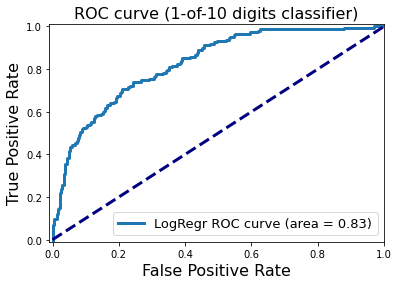

In [21]:
from sklearn.metrics import roc_curve, auc
#Compute and plot the ROC
y_score_lr = lr_model.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes()

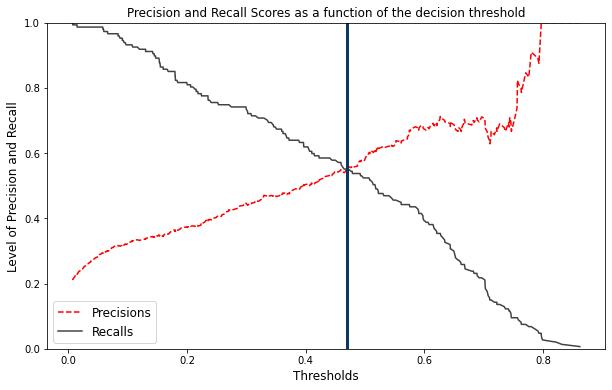

In [22]:
from sklearn.metrics import precision_recall_curve
y_scores=lr_prediction
prec, rec, tre = precision_recall_curve(y_test, y_scores[:,1], )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.ylabel("Level of Precision and Recall", fontsize=12)
    plt.title("Precision and Recall Scores as a function of the decision threshold", fontsize=12)
    plt.xlabel('Thresholds', fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.ylim([0,1])
    plt.axvline(x=0.47, linewidth=3, color="#0B3861")
    
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [23]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scores[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.58


In [24]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

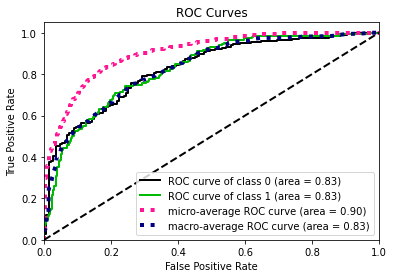

In [25]:
import scikitplot as skplt #to make things easy

skplt.metrics.plot_roc(y_test, lr_prediction)

Confusion matrix
[[502  55]
 [ 70  77]]


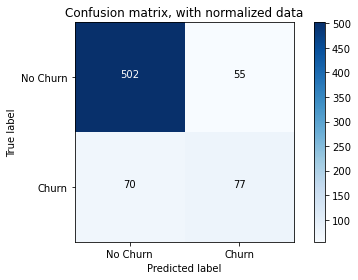

In [26]:

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

In [27]:
#F1 = 2 * (precision * recall) / (precision + recall)
f1 = 2*(0.5833*0.5238)/(0.5833 + 0.5238)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.55


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.58      0.52      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.82      0.82      0.82       704



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=101, n_estimators=100).fit(X_train, y_train)
rf_prediction = rf_model.predict_proba(X_test)
rf_model.score(X_test, y_test)
#rf_pred = prediction_test #prediction

0.7798295454545454

In [30]:
rfpred_test = rf_model.predict(X_test)

In [31]:
print(classification_report(y_test, rfpred_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       557
           1       0.47      0.45      0.46       147

    accuracy                           0.78       704
   macro avg       0.66      0.66      0.66       704
weighted avg       0.78      0.78      0.78       704



In [32]:
from sklearn.calibration import calibration_curve
lr_y, lr_x = calibration_curve(y_test, lr_prediction[:,1], n_bins=20)

In [33]:
[lr_y, lr_x]

[array([0.01, 0.09, 0.13, 0.21, 0.17, 0.12, 0.27, 0.25, 0.25, 0.33, 0.4 ,
        0.45, 0.64, 0.63, 0.71, 0.65, 1.  , 1.  ]),
 array([0.02, 0.07, 0.12, 0.17, 0.23, 0.27, 0.32, 0.38, 0.42, 0.48, 0.52,
        0.58, 0.63, 0.67, 0.72, 0.78, 0.83, 0.86])]

In [34]:

rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=20)

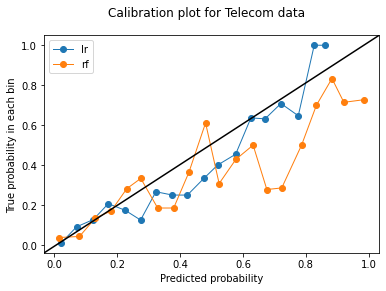

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(lr_x,lr_y, marker='o', linewidth=1, label='lr')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Telecom data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [36]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))

bin_total(y_test, lr_prediction[:,1], n_bins=20)

array([191,  88,  47,  58,  46,  32,  30,  32,  24,  24,  25,  22,  22,
        19,  24,  17,   2,   1,   0,   0,   0], dtype=int64)

In [37]:
bin_total(y_test, rf_prediction[:,1], n_bins=20)

array([213,  70,  59,  47,  39,  42,  27,  27,  22,  18,  26,  21,  22,
        18,   7,  12,  10,   6,   7,  11,   0], dtype=int64)

In [38]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=1234, solver='lbfgs').fit(X_train, y_train)
clf_prediction = clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.8238636363636364

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print(accuracies.mean())

0.7993045226632699


In [40]:
print(accuracies.std())

0.004005675441439588


In [41]:
rlf = RandomForestClassifier(random_state=101, n_estimators=100).fit(X_train, y_train)
rlf_prediction = rlf.predict_proba(X_test)
rlf.score(X_test, y_test)

0.7798295454545454

In [42]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rlf, X=X_train, y=y_train, cv=5)

In [43]:
print(all_accuracies.mean())

0.7817636076403849


In [44]:
print(all_accuracies.std())

0.005128766725040641


In [45]:
clf_y, clf_x = calibration_curve(y_test, clf_prediction[:,1], n_bins=20)
rlf_y, rlf_x = calibration_curve(y_test, rlf_prediction[:,1], n_bins=20)

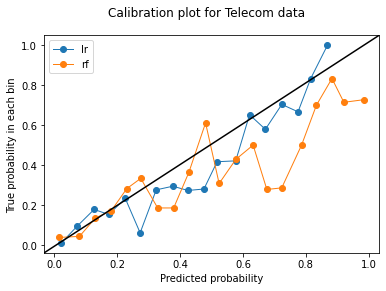

In [46]:
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(clf_x,clf_y, marker='o', linewidth=1, label='lr')
plt.plot(rlf_x, rlf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Telecom data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [47]:
bin_total(y_test, clf_prediction[:,1], n_bins=20)

array([198,  85,  45,  59,  43,  33,  29,  34,  22,  25,  24,  19,  23,
        19,  27,  12,   6,   1,   0,   0,   0], dtype=int64)

In [48]:
bin_total(y_test, rlf_prediction[:,1], n_bins=20)

array([213,  70,  59,  47,  39,  42,  27,  27,  22,  18,  26,  21,  22,
        18,   7,  12,  10,   6,   7,  11,   0], dtype=int64)